In [24]:
!pip install --upgrade pandas
!pip install networkx
!pip install matplotlib
!pip install scipy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.1/35.1 MB 7.1 MB/s eta 0:00:0000:0100:01


In [12]:
import requests
import pandas as pd
import re
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import networkx as nx

In [28]:
films_list = []
years = list(range(1970,2024))

for year in years:
    url = f"https://en.wikipedia.org/wiki/List_of_Argentine_films_of_{year}"
    response = requests.get(url)
    soup = BeautifulSoup(response.text, "html.parser")

    if year < 2002:
        table = soup.find_all("table")[1]
        rows = table.find_all("tr")[1:]
        titles_col = 0
    if year > 2002 and year < 2012:
        table = soup.find_all("table")[0]
        rows = table.find_all("tr")[1:]
        titles_col = 0
    elif year == 2018:
        sections = soup.find_all("div", class_="div-col")
        titles_col = 0
    else:
        table = soup.find_all("table", class_="wikitable")
        if table == []:
            continue
        table = table[0]
        rows = table.find_all("tr")[1:]
        if year in [2017, 2019]:
            titles_col = 1
        else:
            titles_col = 0

    if year < 2018 or year > 2019:
        for row in rows:
            cells = row.find_all("td")
            if len(cells) == 0:
                continue
            if "-" in cells[0].text.strip():
                continue
            title = cells[titles_col].text.strip()
            films_list.append(title)
    elif year == 2018:
        for section in sections:
            month_title = section.find_previous_sibling("h3").text.strip()
            if month_title == "External links":
                continue
            for li in section.find_all("li"):
                title = li.text.strip()
                films_list.append(title)

print(films_list)

['Amalio Reyes, un hombre', 'Blum', 'Con alma y vida', 'La Cosecha', 'El despertar del sexo', 'Este loco verano', 'El extraño del pelo largo', 'La fidelidad', 'Gitano', 'La guita', 'Los herederos', 'El hombre del año', 'El hombre del ovni', 'Joven viuda y estanciera', 'Juan Lamaglia y Sra.', 'Moamba (Vidas vendidas)', "Los mochileros'", 'Mosaico', 'Muchacho', 'Los Muchachos de mi barrio', 'El Mundo es de los jóvenes', 'Pimienta y Pimentón', 'El Profesor patagónico', 'Radiografías', 'El Santo de la espada', 'El sátiro', 'Una cabaña en la Pampa', 'Un elefante color de ilusión', 'Un gaucho con plata', 'Argentino hasta la muerte', 'Aquellos años locos', '¡Arriba juventud!', 'Así es Buenos Aires', 'El ayudante', 'Bajo el signo de la patria', 'Balada para un mochilero', 'La bestia desnuda', 'Los buenos sentimientos', 'La buscona', 'El caradura y la millonaria', 'Crónica de una señora', 'David Amitin', 'El destino', 'El diablo sin dama', 'Embrujo de amor', 'En una playa junto al mar', 'La Fam

In [29]:
for i in range(len(films_list)):
    films_list[i] = re.sub(r'\([^)]*\)', '', films_list[i])
    films_list[i] = films_list[i].replace(" ", "_")
    films_list[i] = films_list[i].replace("\xa0[es]", "")
    if films_list[i][-1] == "_":
        films_list[i] = films_list[i][:-1]

print(films_list)

['Amalio_Reyes,_un_hombre', 'Blum', 'Con_alma_y_vida', 'La_Cosecha', 'El_despertar_del_sexo', 'Este_loco_verano', 'El_extraño_del_pelo_largo', 'La_fidelidad', 'Gitano', 'La_guita', 'Los_herederos', 'El_hombre_del_año', 'El_hombre_del_ovni', 'Joven_viuda_y_estanciera', 'Juan_Lamaglia_y_Sra.', 'Moamba', "Los_mochileros'", 'Mosaico', 'Muchacho', 'Los_Muchachos_de_mi_barrio', 'El_Mundo_es_de_los_jóvenes', 'Pimienta_y_Pimentón', 'El_Profesor_patagónico', 'Radiografías', 'El_Santo_de_la_espada', 'El_sátiro', 'Una_cabaña_en_la_Pampa', 'Un_elefante_color_de_ilusión', 'Un_gaucho_con_plata', 'Argentino_hasta_la_muerte', 'Aquellos_años_locos', '¡Arriba_juventud!', 'Así_es_Buenos_Aires', 'El_ayudante', 'Bajo_el_signo_de_la_patria', 'Balada_para_un_mochilero', 'La_bestia_desnuda', 'Los_buenos_sentimientos', 'La_buscona', 'El_caradura_y_la_millonaria', 'Crónica_de_una_señora', 'David_Amitin', 'El_destino', 'El_diablo_sin_dama', 'Embrujo_de_amor', 'En_una_playa_junto_al_mar', 'La_Familia_hippie', 'Fu

In [31]:
## Film by film process Cast
df = pd.DataFrame(columns=["movie", "actors"])
print(f"There are {len(films_list) + 1} movies")
i = 1
for movie in films_list:
    print(i)
    i = i+1
    # Format the Wikipedia link
    url = f"https://en.wikipedia.org/wiki/{movie}"

    response = requests.get(url)
    soup = BeautifulSoup(response.content, "html.parser")

    section = soup.find("span", id="Cast")
    if section:
        section = section = section.parent
    else:
        continue

    actors_list = []
    for li in section.find_next("ul").find_all("li"):
        actor = li.get_text().split(" as ")[0].strip()
        actors_list.append(actor)

    df.loc[len(df)] = [movie, actors_list]

print(df)

There are 2029 movies
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
27

In [44]:
actors = list(set(df['actors'].sum()))
connections = {}

for actors_list in df['actors']:
    for i in range(len(actors_list)):
        for j in range(i+1, len(actors_list)):
            actor1 = actors_list[i]
            actor2 = actors_list[j]
            if actor1 not in connections:
                connections[actor1] = {}
            if actor2 not in connections:
                connections[actor2] = {}
            if actor2 not in connections[actor1]:
                connections[actor1][actor2] = 0
            if actor1 not in connections[actor2]:
                connections[actor2][actor1] = 0
            connections[actor1][actor2] += 1
            connections[actor2][actor1] += 1

# Create a graph from the dictionary of connections
graph = nx.Graph(connections)

# Calculate the degree centrality of each node in the graph
centrality = nx.degree_centrality(graph)

# Find the actor with the highest degree centrality
most_connected_actor = max(centrality, key=centrality.get)

print(f"The argentinian Kevin Bacon is {most_connected_actor} with a centrality of {centrality[most_connected_actor]}")

The argentinian Kevin Bacon is Héctor Alterio with a centrality of 0.06875203649397198


NameError: name 'plt' is not defined

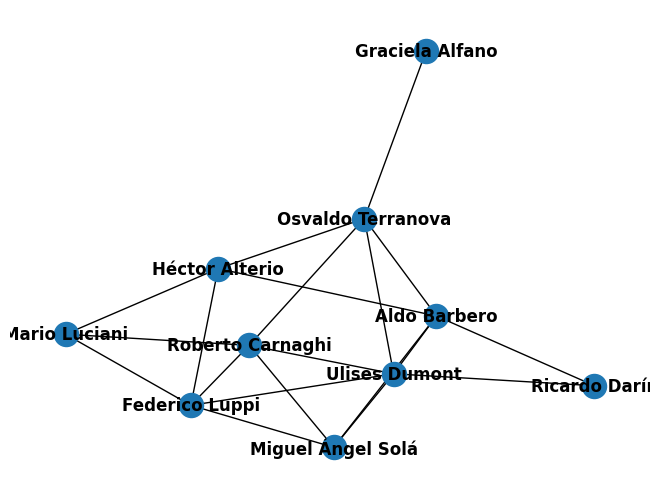

In [45]:
min_centrality = 0.04
graph.remove_nodes_from([node for node in graph if centrality[node] < min_centrality])
nx.draw(graph, with_labels=True, font_weight='bold')
plt.show()